In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

In [404]:
def complex_interaction(x_window):
    """
    Applies an arbitrary complex interaction to the elements of x_window.
    :param x_window: A numpy array of the last SEQ_LEN elements in the sequence.
    :return: A single float value resulting from the complex interaction.
    """
    SEQ_LEN = len(x_window)
    pos = np.arange(1, SEQ_LEN + 1)  # Positional information

    # Arbitrary complex interaction:
    # - Sine of the positions to introduce periodicity
    # - Power of elements to their reversed positions for non-linear scaling
    # - A polynomial term for an additional non-linear interaction
    interaction = np.sum(
        np.sin(pos * 2 * np.pi / SEQ_LEN)
        + np.cos(pos * 2 * np.pi / SEQ_LEN) * np.power(x_window, 2 / pos[::-1])
    )

    return interaction


x = np.arange(0, 2, 1e-4)
SEQ_LEN = 10
y = []
lo = -0.4
hi = 0.6
params = np.arange(lo, hi, 1.0 / ((hi - lo) * SEQ_LEN))
for idx in range(len(x)):
    sequence_dependent_params = (
        params[0 : min(idx + 1, SEQ_LEN)]
        * 1.0
        / (np.arange(1, min(idx + 2, SEQ_LEN + 1)))
    )
    # print(sequence_dependent_params, ' len = ', len(sequence_dependent_params))
    x_window = x[max(0, idx - SEQ_LEN + 1) : (idx + 1)]

    interaction = complex_interaction(x_window)
    # print(x_window)
    y.append(interaction)
    # print()

In [873]:
x = np.arange(0, 20, 1e-4)
y = np.sin(x)
y = (y - np.min(y)) / (np.max(y) - np.min(y))

In [874]:
len(x), len(y)

(200000, 200000)

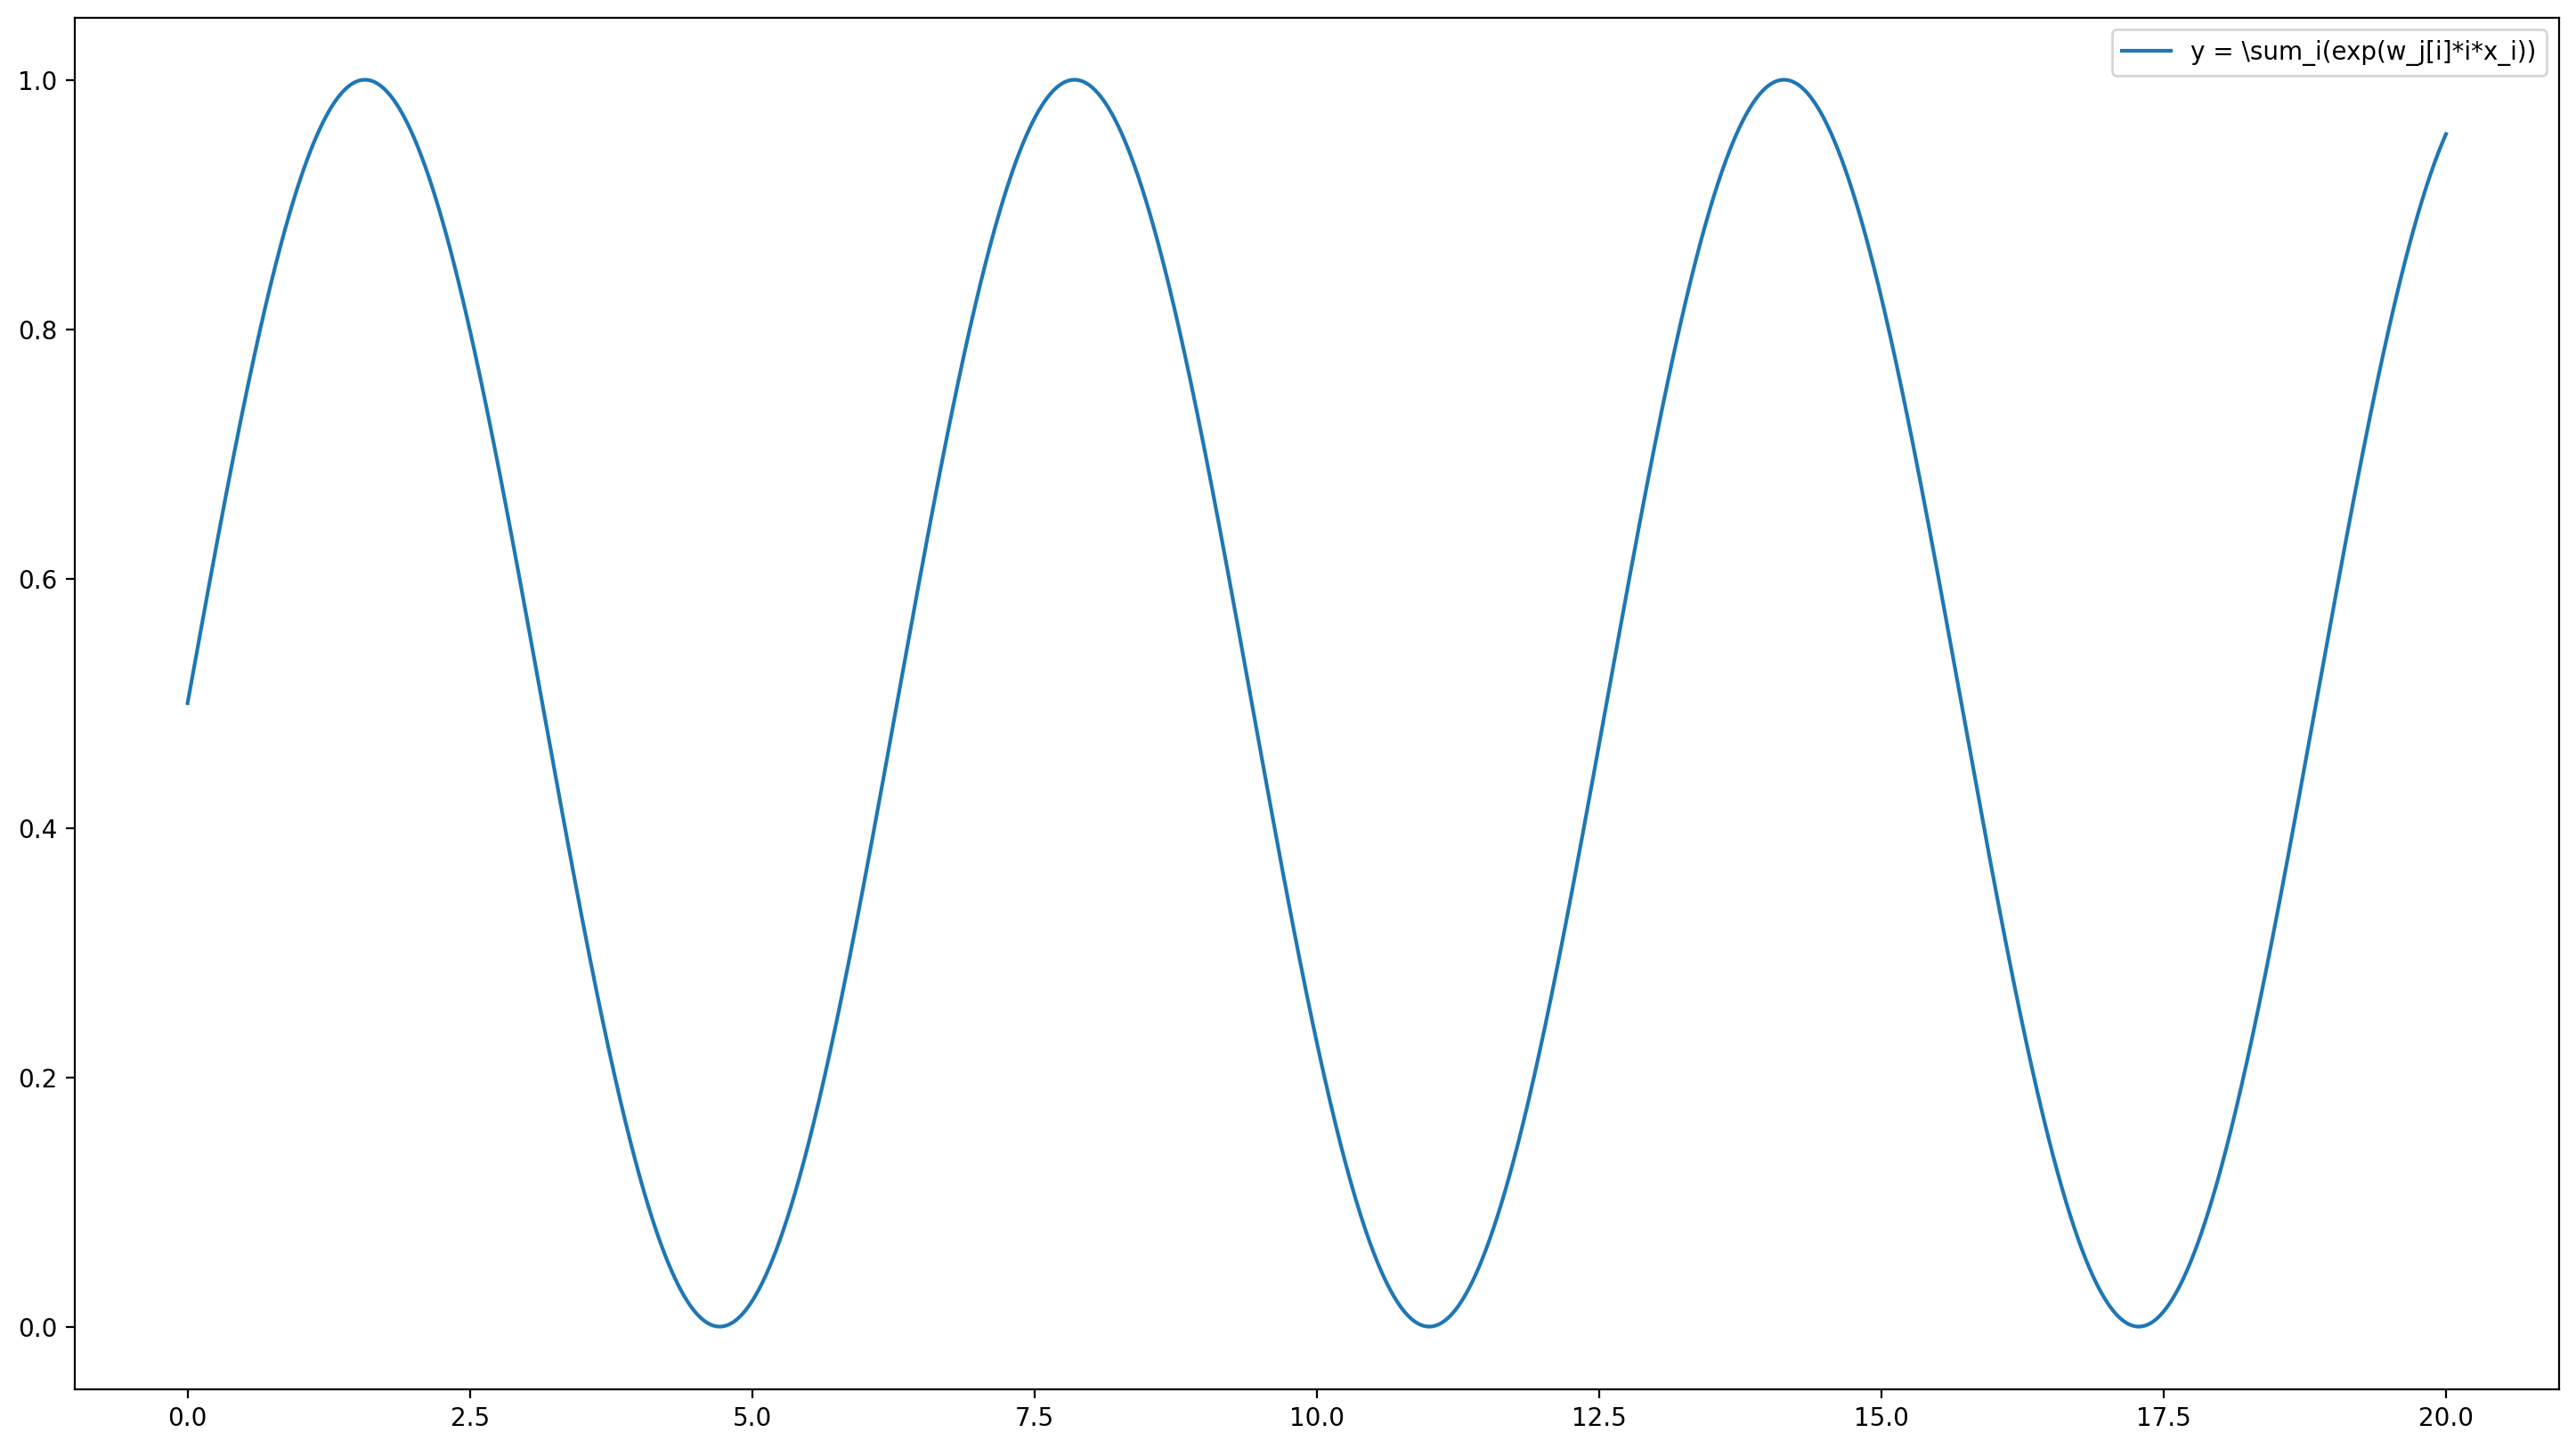

In [826]:
# Plot the data
ax = plt.subplot(111)
ax.figure.set_size_inches(18, 10)
ax.figure.set_dpi(200)
ax.plot(x, y, label="y = \sum_i(exp(w_j[i]*i*x_i))")
_ = ax.legend()

Each element in the dataloader gives me a batch of size torch.Size([56, 10, 1])



In [ ]:
# TODO: instead of having tensors in create_sequences, create [(x[idx], idx)..] tuples
# to preserve the plotting indices then at the last moment in the data loader
# convert x[idx]'s to tensors and use them. During inference we can use the indices.

In [869]:
x_seq[2]

(array([[0.00177665],
        [0.01887906],
        [0.9479258 ],
        [0.3037789 ],
        [0.2787846 ],
        [0.13609535],
        [0.49676472],
        [0.36024424],
        [0.88153934],
        [0.08855729],
        [0.9474179 ],
        [0.04603732],
        [0.7483967 ],
        [0.8533694 ],
        [0.2114709 ]], dtype=float32),
 range(0, -1))

In [876]:
x_seq[2]

(array([[0.53995735],
        [0.54000719],
        [0.54005703],
        [0.54010687],
        [0.5401567 ],
        [0.54020654],
        [0.54025638],
        [0.54030622],
        [0.54035605],
        [0.54040589],
        [0.54045573],
        [0.54050556],
        [0.5405554 ],
        [0.54060523],
        [0.54065507],
        [0.5407049 ],
        [0.54075474],
        [0.54080457],
        [0.5408544 ],
        [0.54090424],
        [0.54095407],
        [0.5410039 ],
        [0.54105373],
        [0.54110356],
        [0.54115339],
        [0.54120322],
        [0.54125305],
        [0.54130288],
        [0.54135271],
        [0.54140254],
        [0.54145237],
        [0.5415022 ],
        [0.54155202],
        [0.54160185],
        [0.54165168],
        [0.5417015 ],
        [0.54175133],
        [0.54180115],
        [0.54185098],
        [0.5419008 ],
        [0.54195063],
        [0.54200045],
        [0.54205027],
        [0.54210009],
        [0.54214992],
        [0

In [875]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

y = np.array(y).reshape(-1, 1)

# Define the sequence length
PARTS = 500
SEQUENCE_LENGTH = len(y) // PARTS


# Function to chop data into sequences
def create_sequences(y, seq_length, parts=100):
    xs, ys = [], []
    for i in range(parts):
        xs.append(
            (
                y[
                    i * seq_length : ((i + 1) * seq_length) - 1
                ],  # -1 to exclude the last element for the label
                range(i * seq_length, ((i + 1) * seq_length - 1)),
            )
        )
        ys.append(
            (
                y[(i + 1) * seq_length - 1],
                range((i + 1) * seq_length - 1, (i + 1) * seq_length),
            )
        )
    return (
        xs,
        ys,
    )


# Create sequences
x_seq, y_seq = create_sequences(y, SEQUENCE_LENGTH, parts=PARTS)

# Choose at random K parts for training and N - K parts for testing from x_seq and y_seq
# Assuming you have two lists: list1 and list2


# Split the lists into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x_seq, y_seq, test_size=0.2, random_state=42
)


# SLICE_SIZE = len(y_seq) // PARTS
# x_train_parts = []
# x_test_parts = []
# y_train_parts = []
# y_test_parts = []
# # NOTE: maybe do it at random intervals?
# for i in range(PARTS):
#     y_slice = y_seq[i * SLICE_SIZE : (i + 1) * SLICE_SIZE]
#     x_slize = x_seq[i * SLICE_SIZE : (i + 1) * SLICE_SIZE]
#     n_train = int(SLICE_SIZE * 0.8)
#     # 0: 100,            100: 200             200: 290
#     # (0: 80, 80: 100), (100: 180, 180: 200), (200: 280, 280: 290)
#     y_train, y_test = y_slice[:n_train], y_slice[n_train:]
#     x_train, x_test = x_slize[:n_train], x_slize[n_train:]

#     y_train_parts.append(y_train)  # 0: 80, 100: 180, 200: 280...
#     y_test_parts.append(y_test)  # 80: 100, 180: 200, 280: 300...
#     x_train_parts.append(x_train)
#     x_test_parts.append(x_test)

# print(
#     f"Train Data: {len(x_train_parts)} of shape {set(i.shape for i, _ in x_train_parts)} each"
# )
# print(
#     f"Train Labels: {len(y_train_parts)} of shape {set(i.shape for i, _ in y_train_parts)} each"
# )
# print(
#     f"Test Data: {len(x_test_parts)} of shape {set(i.shape for i, _ in x_test_parts)} each"
# )
# print(
#     f"Test Labels: {len(y_test_parts)} of shape {set(i.shape for i, _ in y_test_parts)} each"
# )
# # print(f"{len(y_test_parts)}")

In [781]:
x_1 = x_train[1][0]
x_1.reshape(-1).shape

(399,)

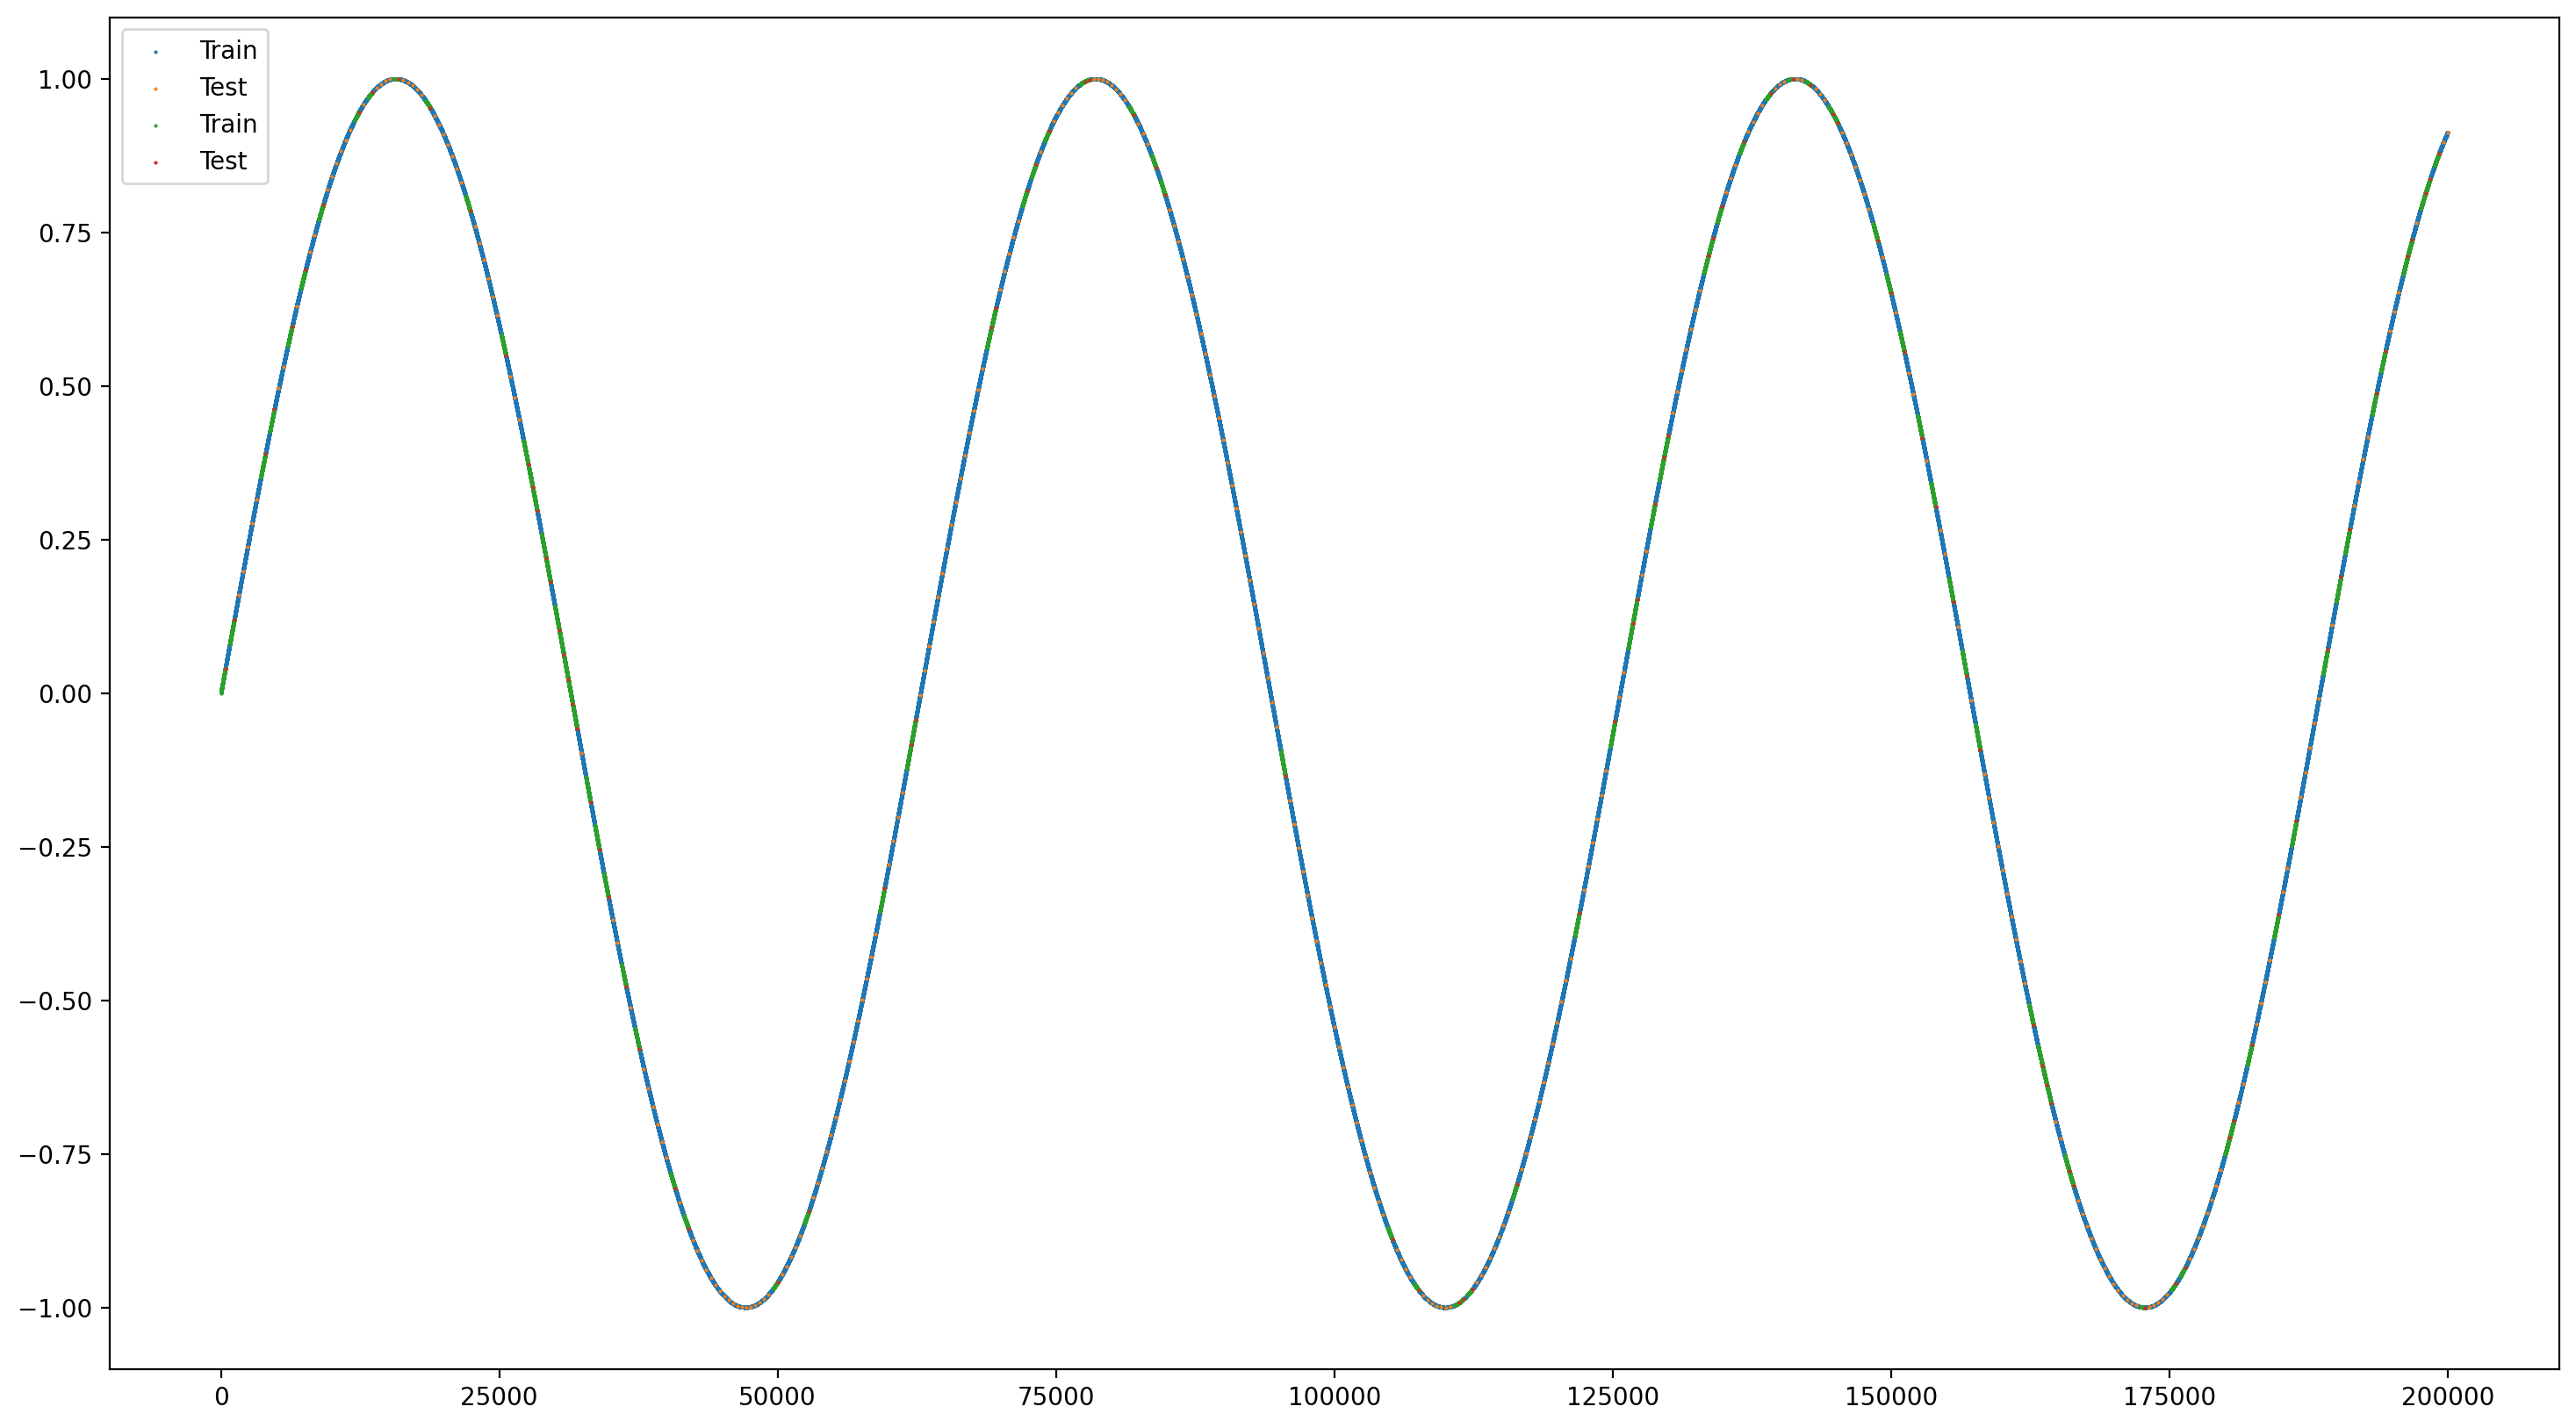

In [783]:
marker_size = 1


def plot_data(x_train, y_train, ax=None):
    if ax is None:
        ax = plt.subplot(111)
        ax.figure.set_size_inches(18, 10)
        ax.figure.set_dpi(200)
    x_train_x_axis_idxs = [list(rng) for _, rng in x_train]
    x_train_y_axis_data = [x.reshape(-1) for x, _ in x_train]
    y_train_x_axis_idxs = [list(rng) for _, rng in y_train]
    y_train_y_axis_data = [y.reshape(-1) for y, _ in y_train]

    ax.scatter(
        x_train_x_axis_idxs,
        x_train_y_axis_data,
        label="Train",
        s=marker_size,
        marker=".",
    )
    ax.scatter(
        y_train_x_axis_idxs,
        y_train_y_axis_data,
        label="Test",
        s=marker_size,
        marker=".",
    )
    return ax


ax = plot_data(x_train, y_train)
ax = plot_data(x_test, y_test, ax)
ax.legend()
# Split into training and test sets
# x_train, x_test, y_train, y_test =
# train_test_split(
#     x_seq, y_seq, test_size=0.2, random_state=42
# )

In [656]:
device = torch.device("cpu")

In [657]:
class SimpleRNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, device):
        super(SimpleRNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True, device=device)
        self.fc = nn.Linear(hidden_size, output_size, device=device)

    def forward(self, x):
        out, hidden = self.rnn(x)
        # print(out.shape, hidden.shape)
        out = self.fc(out[:, -1, :])  # Take the output of the last RNN step
        return out.squeeze(1)

In [658]:
model = SimpleRNNModel(input_size=1, hidden_size=50, output_size=1, device=device)

In [659]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [660]:
train_losses = []
test_losses = []

In [661]:
torch_x_training_data = [
    torch.tensor(x.reshape(-1)).to(torch.float32) for x, _ in x_train
]
torch_y_test_data = [torch.tensor(y).to(torch.float32) for y, _ in y_train]
torch_x_test_data = [torch.tensor(x.reshape(-1)).to(torch.float32) for x, _ in x_test]
torch_y_test_data = [torch.tensor(y).to(torch.float32) for y, _ in y_test]


def convert_to_device(data, device):
    return [d.to(device) for d in data]

In [662]:
# inputs.view(1, sequence_length, 1).shape
# inputs.unsqueeze(1).to(torch.float32)
for inputs, targets in zip(torch_x_training_data, torch_y_test_data):

    with torch.no_grad():
        output = model(inputs.view(1, -1, 1))
        print(output)
        break

tensor([-0.1623])


In [663]:
# Evaluation helper function
def evaluate_model(model, x_test, y_test):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        total_loss = 0
        for inputs, targets in zip(x_test, y_test):
            outputs = model(inputs.view(1, -1, 1))

            loss = criterion(outputs, targets)
            total_loss += loss.item()
        print(f"Test Loss: {total_loss / len(y_test)}")
        return total_loss / len(y_test)

In [667]:
# The ideas is that
for epoch in range(20):
    for inputs, targets in zip(torch_x_training_data, torch_y_test_data):
        optimizer.zero_grad()
        outputs = model(inputs.view(1, -1, 1))  # view(-1, sequence_length, 1))
        loss = criterion(outputs, targets)
        loss.backward()
        train_losses.append(loss.item()),
        optimizer.step()

        test_losses.append(evaluate_model(model, torch_x_test_data, torch_y_test_data))
    print(f"Epoch {epoch+1}, Train Loss: {loss.item()}")

Test Loss: 1.7486783318582457
Test Loss: 1.7499131541431416
Test Loss: 1.751458726990968
Test Loss: 1.7533131787960883
Test Loss: 1.7556187405996024
Test Loss: 1.7584293241053819
Test Loss: 1.7607692805782427
Test Loss: 1.7625663753063419
Test Loss: 1.7648341925669229
Test Loss: 1.7680740347714163
Test Loss: 1.7703919198625955
Test Loss: 1.7738075111299987
Test Loss: 1.776226661784458
Test Loss: 1.7776624565117527
Test Loss: 1.7774941694363953
Test Loss: 1.777217392945313
Test Loss: 1.7772614043188515
Test Loss: 1.7771102235961007
Test Loss: 1.7770541979093104
Test Loss: 1.7778699428611435
Test Loss: 1.7795143626618666
Test Loss: 1.7826903783495072
Test Loss: 1.7859255648535326
Test Loss: 1.7895120855470303
Test Loss: 1.792255253589069
Test Loss: 1.7960092385044117
Test Loss: 1.7968359391129343
Test Loss: 1.797157278605955
Test Loss: 1.7958952681465303
Test Loss: 1.7948742391039105
Test Loss: 1.7969132226292277
Test Loss: 1.7993191280914471
Test Loss: 1.799475761962094
Test Loss: 1.798

In [559]:
train_data = DataLoader(
    TensorDataset(torch.concat(y_train_parts)), batch_size=64, shuffle=False
)
test_data = DataLoader(
    TensorDataset(torch.concat(y_test_parts)), batch_size=64, shuffle=False
)

In [560]:
# Lets do some inference and plot
predicted_outputs = []
for inputs, target in zip(x_test_parts, y_test_parts):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        outputs = model(inputs.view(1, -1, 1).to(torch.float32))
        predicted_outputs.append(outputs)
print(
    f"{len(y_test_parts)} points to predict, {len(y_test_idx_for_plots)} plotting indicces"
)

100 points to predict, 4000 plotting indicces


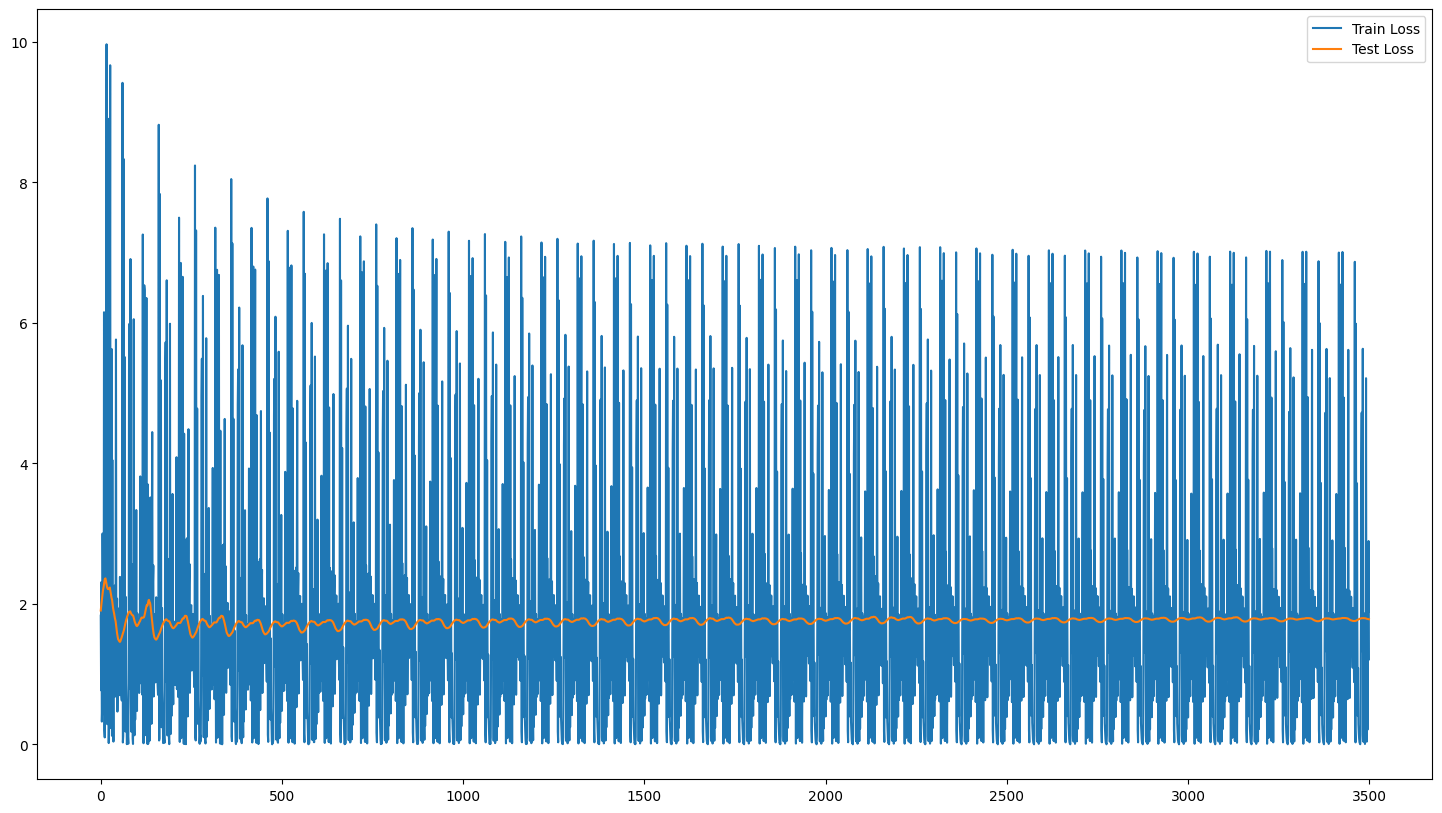

In [668]:
ax = plt.subplot(111)
ax.figure.set_size_inches(18, 10)
ax.plot(train_losses, label="Train Loss")
ax.plot(test_losses, label="Test Loss")
ax.legend(loc="upper right")

# Try with data loaders and batching and see if loss curves are better behaved?

In [842]:
class SimpleRNNModelBatched(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, device):
        super(SimpleRNNModelBatched, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True, device=device)
        # Add a layer normalization layer
        self.ln = nn.LayerNorm(hidden_size)
        self.fc = nn.Linear(hidden_size, output_size, device=device)

    def forward(self, x):
        out, hidden = self.rnn(x)
        # print(out.shape, hidden.shape)
        out = self.ln(out)
        out = self.fc(out[:, -1, :])  # Take the output of the last RNN step
        return out

In [877]:
from torch.utils.data import DataLoader, Dataset, TensorDataset


class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.x = [torch.tensor(x.reshape(-1)).to(torch.float32) for x, _ in x_train]
        self.y = [torch.tensor(y).to(torch.float32) for y, _ in y_train]

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [878]:
batched_model = SimpleRNNModelBatched(
    input_size=1, hidden_size=50, output_size=1, device=torch.device("cpu")
)

In [879]:
training_dataset = CustomDataset(x_train, y_train)
test_dataset = CustomDataset(x_test, y_test)

In [880]:
training_loader = DataLoader(training_dataset, batch_size=64, shuffle=True)
testing_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [881]:
batched_model_train_losses = []
batched_model_test_loesses = []

In [882]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(batched_model.parameters(), lr=0.001)

In [883]:
# Evaluation helper function
def evaluate_model_batched(model, test_dataloader, criterion):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        total_loss = 0

        for inputs, targets in test_dataloader:
            B, S = inputs.shape
            outputs = model(inputs.view(B, S, 1))
            # print(outputs.shape, targets.shape)
            # if output.shape != targets.shape:
            # print(f"Output shape: {outputs.shape}, Target shape: {targets.shape}")
            loss = criterion(outputs, targets)
            total_loss += loss.item()
        print(f"Test Loss: {total_loss / B}")
        return total_loss / B

In [884]:
for e in range(10):
    for i, (_x, _y) in enumerate(training_loader):
        optimizer.zero_grad()
        B, S = _x.shape
        outputs = batched_model(_x.view(B, S, 1))  # view(-1, sequence_length, 1))
        loss = criterion(outputs, _y)
        loss.backward()
        batched_model_train_losses.append(loss.item())

        optimizer.step()

        batched_model_test_loesses.append(
            evaluate_model_batched(batched_model, testing_loader, criterion)
        )
        print(f"Epoch {epoch+1}, Train Loss: {loss.item()}")

Test Loss: 0.5904245898127556
Epoch 20, Train Loss: 1.9225084781646729
Test Loss: 0.38590727373957634
Epoch 20, Train Loss: 1.2110456228256226
Test Loss: 0.22990983724594116
Epoch 20, Train Loss: 0.9212249517440796
Test Loss: 0.12311058305203915
Epoch 20, Train Loss: 0.5379292964935303
Test Loss: 0.06242280546575785
Epoch 20, Train Loss: 0.31231608986854553
Test Loss: 0.041847323067486286
Epoch 20, Train Loss: 0.1426388919353485
Test Loss: 0.0503368005156517
Epoch 20, Train Loss: 0.09176524728536606
Test Loss: 0.07336024101823568
Epoch 20, Train Loss: 0.12577566504478455
Test Loss: 0.0982136158272624
Epoch 20, Train Loss: 0.17362822592258453
Test Loss: 0.11680376436561346
Epoch 20, Train Loss: 0.21570974588394165
Test Loss: 0.12636508606374264
Epoch 20, Train Loss: 0.2146061509847641
Test Loss: 0.12414045818150043
Epoch 20, Train Loss: 0.2932245433330536
Test Loss: 0.1127134682610631
Epoch 20, Train Loss: 0.29600879549980164
Test Loss: 0.09514334425330162
Epoch 20, Train Loss: 0.269514

Now to generate some data using this data

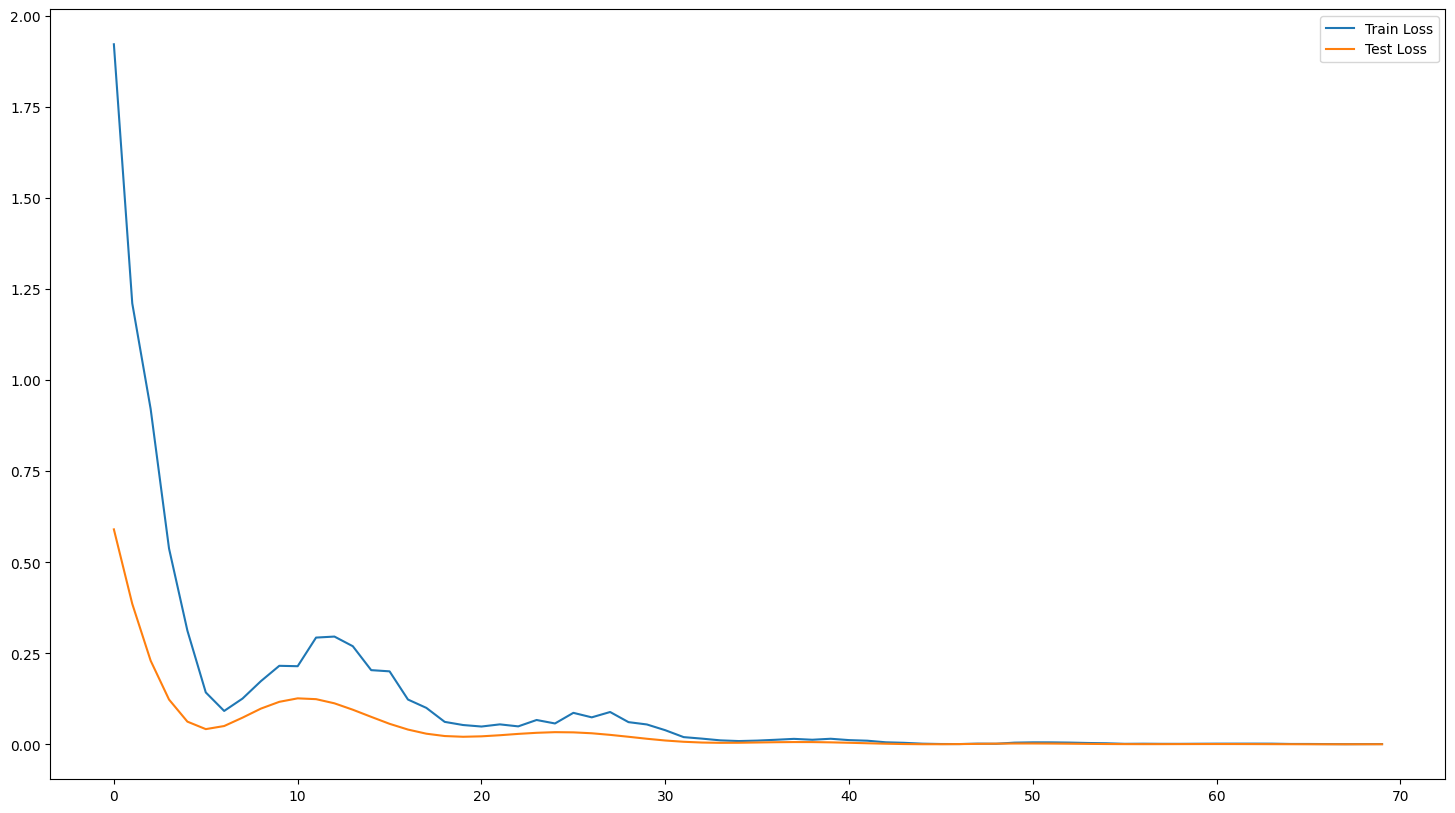

In [885]:
ax = plt.subplot(111)
ax.figure.set_size_inches(18, 10)
ax.plot(batched_model_train_losses, label="Train Loss")
ax.plot(batched_model_test_loesses, label="Test Loss")
ax.legend(loc="upper right")

# Plot the predictions


In [886]:
actual_vs_predictions = []
for (x_data, x_range), (y_data, y_range) in zip(x_test, y_test):
    # print(x_data.shape, x_range)
    # print(y_data.shape, y_range)
    with torch.no_grad():
        outputs = batched_model(torch.tensor(x_data).to(torch.float32).view(1, -1, 1))
        actual_vs_predictions.append(
            ((x_data, x_range), (y_data, y_range), outputs.item())
        )

39900 39900 100 100 100


<Axes: >

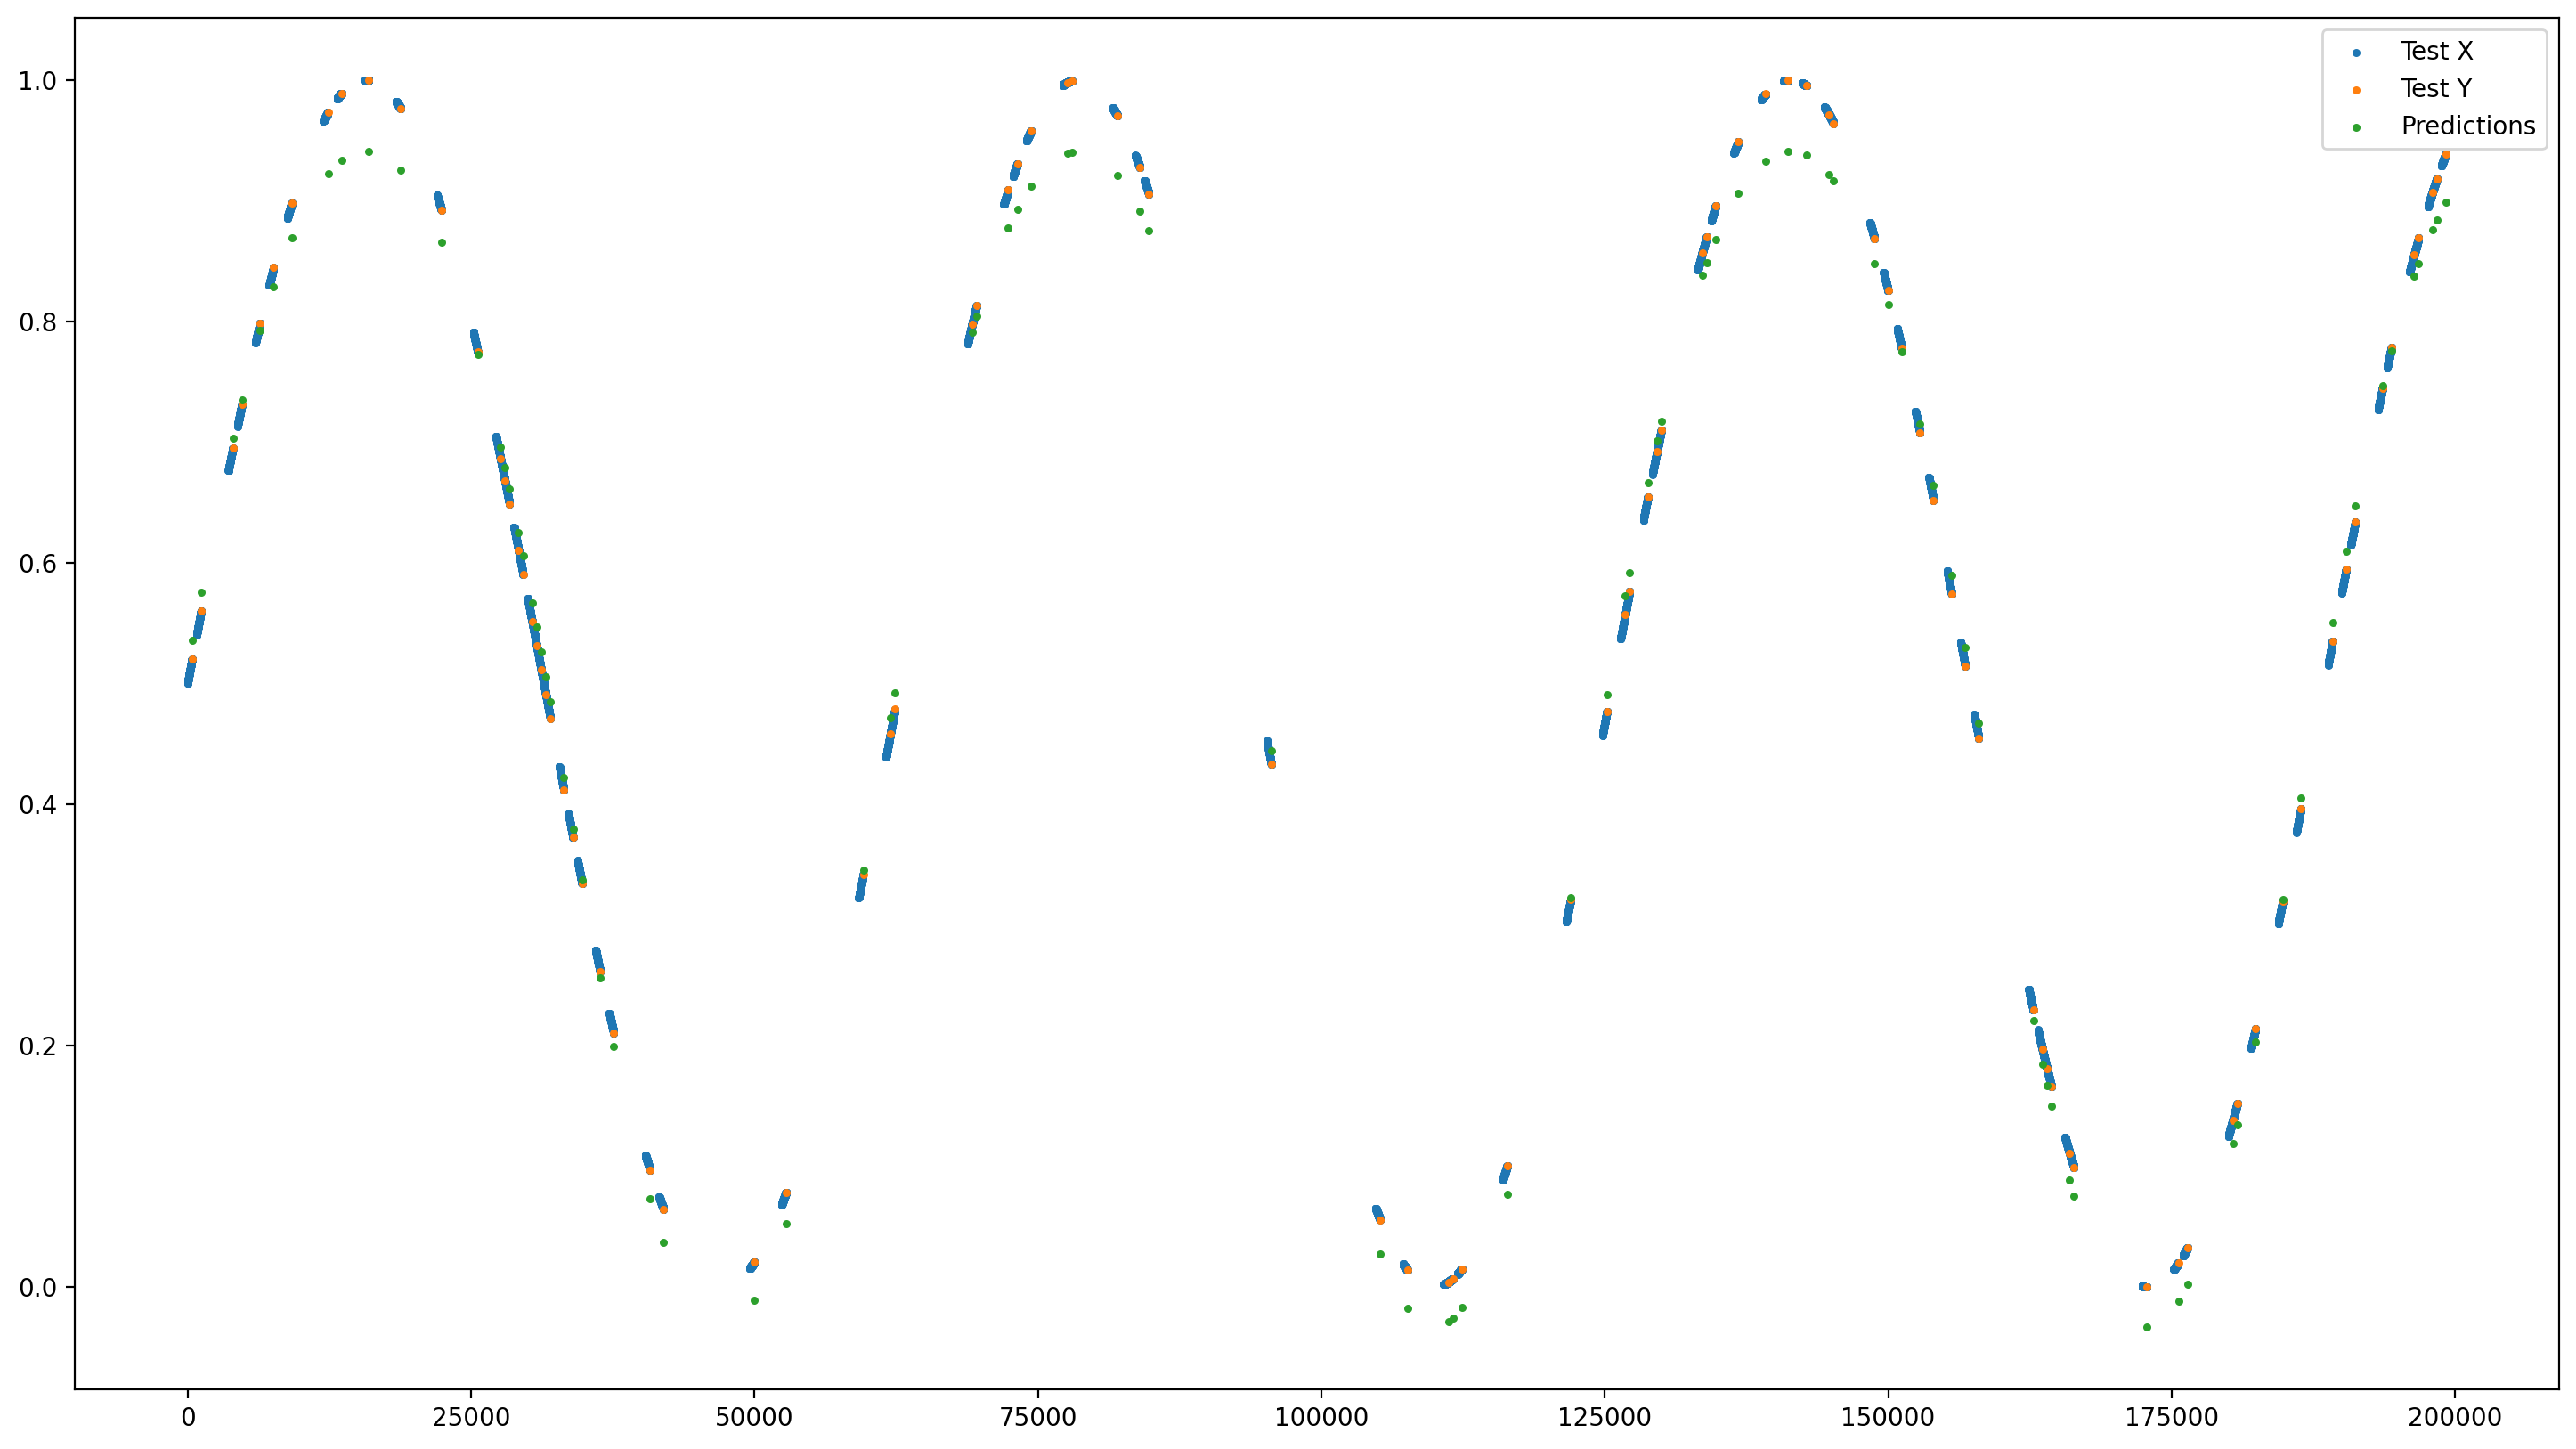

In [889]:
# Now lets plot


def plot_predictions(predictions, marker_size=5):
    ax = plt.subplot(111)
    ax.figure.set_size_inches(18, 10)
    ax.figure.set_dpi(200)
    x_test_x_axis_idxs = []
    x_test_y_axis_data = []
    y_test_x_axis_idxs = []
    y_test_y_axis_data = []
    y_test_y_predictions = []

    for (x_data, x_range), (y_data, y_range), prediction in predictions:
        x_test_x_axis_idxs.extend(list(x_range))
        x_test_y_axis_data.extend(x_data)
        y_test_x_axis_idxs.extend(list(y_range))
        y_test_y_axis_data.extend(y_data)
        y_test_y_predictions.append(prediction)
        # ax.scatter(x_range, x_data, label="x")
        # ax.scatter(y_range, y_data, label="y")
        # ax.scatter(y_range, prediction, label="Prediction")
    print(
        len(x_test_x_axis_idxs),
        len(x_test_y_axis_data),
        len(y_test_x_axis_idxs),
        len(y_test_y_axis_data),
        len(y_test_y_predictions),
    )
    ax.scatter(x_test_x_axis_idxs, x_test_y_axis_data, label="Test X", s=marker_size)
    ax.scatter(y_test_x_axis_idxs, y_test_y_axis_data, label="Test Y", s=marker_size)
    ax.scatter(y_test_x_axis_idxs, y_test_y_predictions, label="Predictions", s=marker_size)
    ax.legend()
    # x_train_x_axis_idxs = [list(rng) for _, rng in x_train]
    # x_train_y_axis_data = [x.reshape(-1) for x, _ in x_train]
    # y_train_x_axis_idxs = [list(rng) for _, rng in y_train]
    # y_train_y_axis_data = [y.reshape(-1) for y, _ in y_train]

    # ax.scatter(
    #     x_train_x_axis_idxs,
    #     x_train_y_axis_data,
    #     label="Train",
    #     s=marker_size,
    #     marker=".",
    # )
    # ax.scatter(
    #     y_train_x_axis_idxs,
    #     y_train_y_axis_data,
    #     label="Test",
    #     s=marker_size,
    #     marker=".",
    # )
    return ax


plot_predictions(actual_vs_predictions)

In [862]:
actual_vs_predictions[10]

((array([[0.00177665],
         [0.01887906],
         [0.9479258 ],
         [0.3037789 ],
         [0.2787846 ],
         [0.13609535],
         [0.49676472],
         [0.36024424],
         [0.88153934],
         [0.08855729],
         [0.9474179 ],
         [0.04603732],
         [0.7483967 ],
         [0.8533694 ],
         [0.2114709 ]], dtype=float32),
  range(0, -1)),
 (array([0.5706095], dtype=float32), range(-1, 0)),
 0.044403620064258575)